In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

In [2]:
# v3 specifically looks at wc_only (not constrained)

#loc = "olds/old_no_overflow_removal/wc_only"
loc = "wc_only"

In [3]:
f_data = uproot.open(f"../TLee_Np0p/fc_files/{loc}/sub_fit_data.root")
f_distribution = uproot.open(f"../TLee_Np0p/fc_files/{loc}/sub_fit_distribution.root")
#f_partial_distribution = uproot.open("../TLee_Np0p/fc_files/wc_only/sub_fit_000011.root")


In [4]:
f_data["tree"].items()

[('grid_Np', <TBranch 'grid_Np' at 0x7f7fd905b510>),
 ('grid_0p', <TBranch 'grid_0p' at 0x7f7fd92ccdd0>),
 ('true_Np', <TBranch 'true_Np' at 0x7f7fd8f3fa50>),
 ('true_0p', <TBranch 'true_0p' at 0x7f7fd8f54610>),
 ('vec_min_status', <TBranchElement 'vec_min_status' at 0x7f7fd9059910>),
 ('vec_chi2_var', <TBranchElement 'vec_chi2_var' at 0x7f7fd8f0e850>),
 ('vec_min_chi2', <TBranchElement 'vec_min_chi2' at 0x7f7fd8f5c450>),
 ('vec_dchi2', <TBranchElement 'vec_dchi2' at 0x7f7fd8f5da90>),
 ('vec_min_fNp_val', <TBranchElement 'vec_min_fNp_val' at 0x7f7fd8f5f050>),
 ('vec_min_fNp_err', <TBranchElement 'vec_min_fNp_err' at 0x7f7fd90cb490>),
 ('vec_min_f0p_val', <TBranchElement 'vec_min_f0p_val' at 0x7f7fd8f71b90>),
 ('vec_min_f0p_err', <TBranchElement 'vec_min_f0p_err' at 0x7f7fd8f73190>)]

In [5]:
f_distribution["tree"].items()

[('grid_Np', <TBranch 'grid_Np' at 0x7f7fd8f76710>),
 ('grid_0p', <TBranch 'grid_0p' at 0x7f7fd8f766d0>),
 ('true_Np', <TBranch 'true_Np' at 0x7f7fd8f80490>),
 ('true_0p', <TBranch 'true_0p' at 0x7f7fd8f81090>),
 ('vec_min_status', <TBranchElement 'vec_min_status' at 0x7f7fd8f82610>),
 ('vec_chi2_var', <TBranchElement 'vec_chi2_var' at 0x7f7fd8f825d0>),
 ('vec_min_chi2', <TBranchElement 'vec_min_chi2' at 0x7f7fd8f8cfd0>),
 ('vec_dchi2', <TBranchElement 'vec_dchi2' at 0x7f7fd8f8e510>),
 ('vec_min_fNp_val', <TBranchElement 'vec_min_fNp_val' at 0x7f7fd8f8fa90>),
 ('vec_min_fNp_err', <TBranchElement 'vec_min_fNp_err' at 0x7f7fd8f75e10>),
 ('vec_min_f0p_val', <TBranchElement 'vec_min_f0p_val' at 0x7f7fd8f96590>),
 ('vec_min_f0p_err', <TBranchElement 'vec_min_f0p_err' at 0x7f7fd8f97b50>)]

In [6]:
#data_dchi2_vals = f_data["tree"]["vec_dchi2"].array() # can't use this, data_min_chi2 is wrong for many grid points, needs to be recalculated
data_chi2_vals = f_data["tree"]["vec_chi2_var"].array()
data_min_chi2_vals = f_data["tree"]["vec_min_chi2"].array()
data_Np_indices = f_data["tree"]["grid_Np"].array()
data_0p_indices = f_data["tree"]["grid_0p"].array()

data_vec_min_statuses = f_data["tree"]["vec_min_status"].array()

distribution_dchi2_vals = f_distribution["tree"]["vec_dchi2"].array()
distribution_chi2_vals = f_distribution["tree"]["vec_chi2_var"].array()
distribution_min_chi2_vals = f_distribution["tree"]["vec_min_chi2"].array()
distribution_Np_indices = f_distribution["tree"]["grid_Np"].array()
distribution_0p_indices = f_distribution["tree"]["grid_0p"].array()


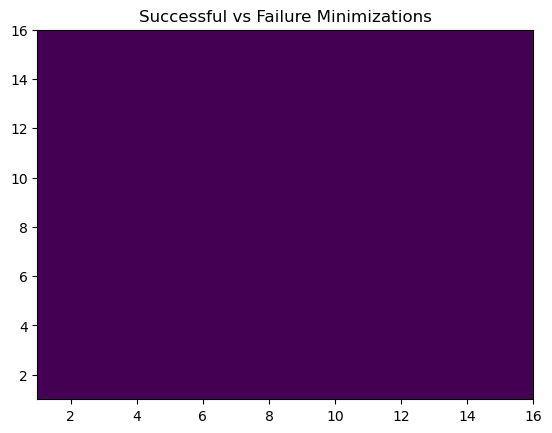

In [7]:
plt.hist2d(list(data_Np_indices), list(data_0p_indices), weights=[_[0] for _ in data_vec_min_statuses])
plt.title("Successful vs Failure Minimizations")
plt.show()

In [8]:
data_min_chi2_val = data_min_chi2_vals[0] # default, if minimization fails, this array won't have a correct value. Assume that (0,0) didn't fail, use that value for all points
print(data_min_chi2_val)
data_min_chi2_vals = [data_min_chi2_val for _ in range(len(data_chi2_vals))]

[44.6]


In [9]:
fifteen_five_dchi2_vals = []
fifteen_five_chi2_vals = []
fifteen_five_min_chi2_vals = []
fifteen_five_data_dchi2_val = []
fifteen_five_data_chi2_val = []
fifteen_five_data_min_chi2_val = []

fifteen_five_data_min_chi2_val = list(data_min_chi2_vals[0]) 

for i in range(len(distribution_dchi2_vals)):

    if distribution_Np_indices[i] == 16 and distribution_0p_indices[i] == 6:
        fifteen_five_dchi2_vals += list(distribution_dchi2_vals[i])
        fifteen_five_chi2_vals += list(distribution_chi2_vals[i])
        fifteen_five_min_chi2_vals += list(distribution_min_chi2_vals[i])

for i in range(len(data_chi2_vals)):

    if data_Np_indices[i] == 16 and data_0p_indices[i] == 6:
        fifteen_five_data_chi2_val += list(data_chi2_vals[i])
        fifteen_five_data_min_chi2_val = list(data_min_chi2_vals[i])
        fifteen_five_data_dchi2_val = [fifteen_five_data_chi2_val[0] - fifteen_five_data_min_chi2_val[0]]

        print("python debug, (15,5) data, vec_min_status:", data_vec_min_statuses[i])
        print("python debug, (15,5) data, chi2, chi2min, dchi2:", fifteen_five_data_chi2_val, fifteen_five_data_min_chi2_val, fifteen_five_data_dchi2_val)

    """if data_Np_indices[i] == 6 and data_0p_indices[i] == 16:
        fifteen_five_data_dchi2_val += list(data_dchi2_vals[i])
        fifteen_five_data_chi2_val += list(data_chi2_vals[i])
        fifteen_five_data_min_chi2_val += list(data_min_chi2_vals[i])
        
        print("python debug, (5,15) data, vec_min_status:", data_vec_min_statuses[i])
        print("python debug, (5,15) data, chi2, chi2min, dchi2:", data_chi2_vals[i], data_min_chi2_vals[i], data_dchi2_vals[i])"""




python debug, (15,5) data, vec_min_status: [0]
python debug, (15,5) data, chi2, chi2min, dchi2: [50.56637770703894] [44.568762290581574] [5.997615416457364]


In [10]:
"""
lhagaman debug, (5,15) data, chi2, chi2min, dchi2: 8.24073, 0.490189, 7.75054
lhagaman debug, (15,5) data, chi2, chi2min, dchi2: 12.1862, 0.490189, 11.696

"""

'\nlhagaman debug, (5,15) data, chi2, chi2min, dchi2: 8.24073, 0.490189, 7.75054\nlhagaman debug, (15,5) data, chi2, chi2min, dchi2: 12.1862, 0.490189, 11.696\n\n'

In [11]:
from scipy.special import erfinv, erfcinv
from scipy.stats import chi2
from scipy.stats import poisson

def get_significance(p_value):
    
    # probability of getting a more extreme result
    #p_value = 1. - chi2.cdf(chisquare, ndf)
    
    sigma = np.sqrt(2.) * erfcinv(p_value)
    
    #if printout: print(f"chi2/ndf: {chisquare}/{ndf}, p value: {p_value}, significance: {sigma} sigma")

    return sigma

In [12]:
num_dchi2_universes_below_data = np.sum(np.array(fifteen_five_dchi2_vals) < fifteen_five_data_dchi2_val)
num_dchi2_universes_above_data = np.sum(np.array(fifteen_five_dchi2_vals) > fifteen_five_data_dchi2_val)

print(f"num dchi2 universes below data: {num_dchi2_universes_below_data}")
print(f"num dchi2 universes above data: {num_dchi2_universes_above_data}")
print(f"total number of universes: {num_dchi2_universes_above_data + num_dchi2_universes_below_data}")
p_value = num_dchi2_universes_above_data / (num_dchi2_universes_above_data + num_dchi2_universes_below_data)
print(f"p value, sigma: {p_value}, {get_significance(p_value)}")


num dchi2 universes below data: 756
num dchi2 universes above data: 114
total number of universes: 870
p value, sigma: 0.1310344827586207, 1.5100350425183782


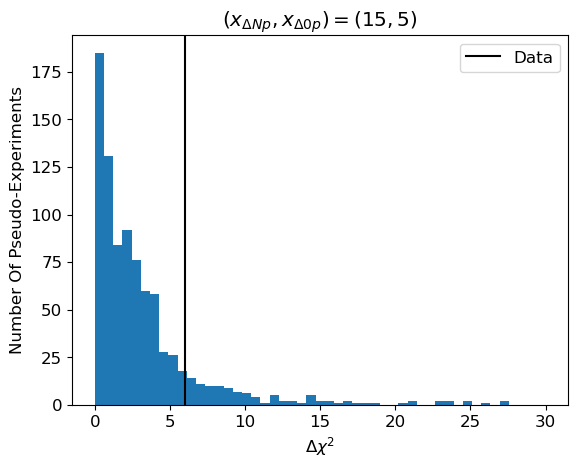

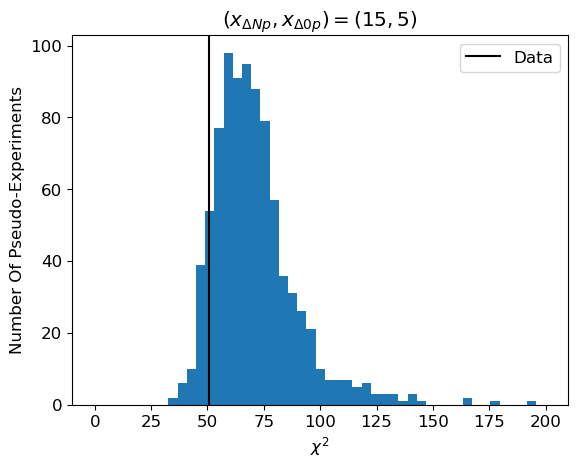

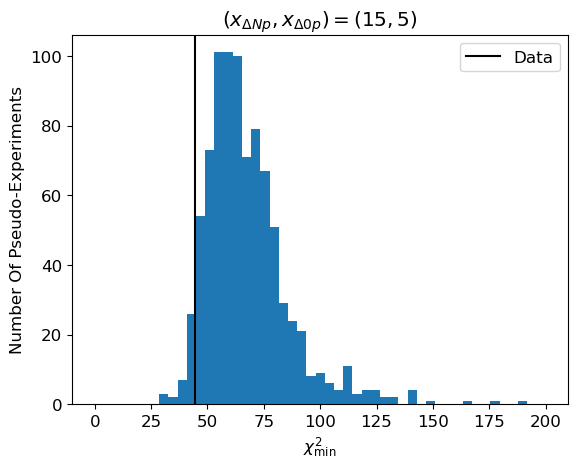

In [13]:
plt.rcParams.update({'font.size': 12})

bins = np.linspace(0, 30, 50)
plt.figure()
plt.axvline(fifteen_five_data_dchi2_val, c="k", label="Data")
plt.hist(fifteen_five_dchi2_vals, bins=bins)
plt.xlabel(r"$\Delta\chi^2$")
plt.ylabel("Number Of Pseudo-Experiments")
plt.title(r"$(x_{\Delta Np}, x_{\Delta 0p}) = (15, 5)$")
plt.legend()
plt.show()

bins = np.linspace(0, 200, 50)

plt.figure()
plt.axvline(fifteen_five_data_chi2_val, c="k", label="Data")
plt.hist(fifteen_five_chi2_vals, bins=bins)
plt.xlabel(r"$\chi^2$")
plt.ylabel("Number Of Pseudo-Experiments")
plt.title(r"$(x_{\Delta Np}, x_{\Delta 0p}) = (15, 5)$")
plt.legend()
plt.show()

bins = np.linspace(0, 200, 50)
plt.figure()
plt.axvline(fifteen_five_data_min_chi2_val, c="k", label="Data")
plt.hist(fifteen_five_min_chi2_vals, bins=bins)
plt.xlabel(r"$\chi^2_{\mathrm{min}}$")
plt.ylabel("Number Of Pseudo-Experiments")
plt.title(r"$(x_{\Delta Np}, x_{\Delta 0p}) = (15, 5)$")
plt.legend()
plt.show()


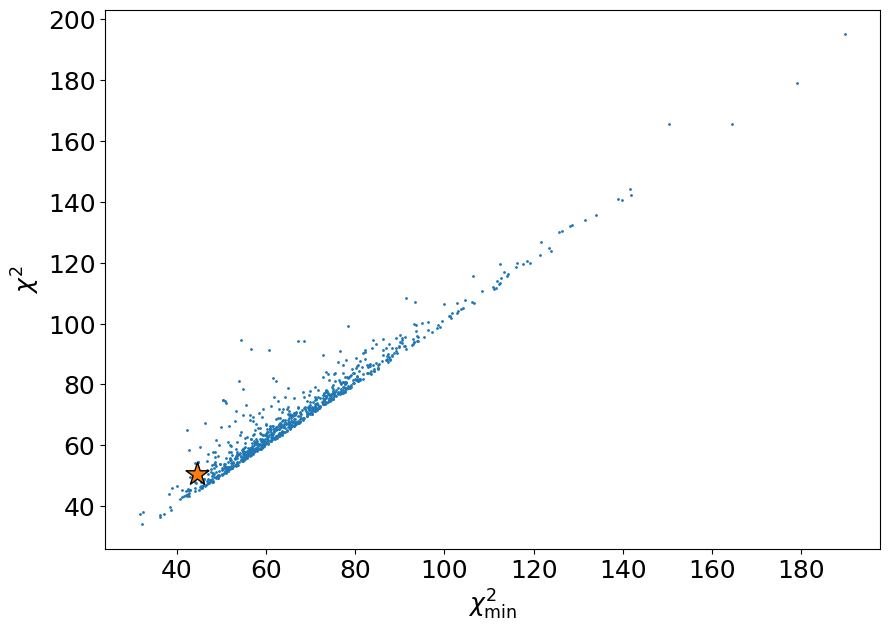

In [14]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,7))
plt.scatter(fifteen_five_min_chi2_vals, fifteen_five_chi2_vals, s=1)
plt.scatter(fifteen_five_data_min_chi2_val, fifteen_five_data_chi2_val, marker="*", s=300, edgecolors="k")
plt.xlabel(r"$\chi^2_{\mathrm{min}}$")
plt.ylabel(r"$\chi^2$")
plt.show()

In [15]:
fifteen_five_data_chi2_val

[50.56637770703894]